In [381]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [382]:
# import dataset into a pandas data frame
df = pd.read_excel('pnas.2115540119.sd01.xlsx')
df.head()


c:\Users\rsore\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


,Level,Site,Area,Country,Min_Age_Ma,Max_Age_Ma,Interpreted_Age_Ma,Confidence_in_cut_marks,Count_Modified_Bones,General/Age notes,Faunal/bone modification notes,Primary Reference,Total_Lithics,Lithic Ref,Lithic Notes
0,BOU-VP-11,BOU-VP-11,Bouri,Ethiopia,2.45,2.504,2.50,high,2,Coordinates from type site of Hata Formation. ...,CM bones are large bovid tibia + Hipparion femur,"(de Heinzelin et al., 1999)",0,"(de Heinzelin et al., 1999)","Rare, isolated, widely scattered cores and fla..."
1,BOU-VP-12,BOU-VP-12,Bouri,Ethiopia,2.45,2.504,2.50,high,2,Coordinates from type site of Hata Formation. ...,"""several pieces of mammalian bone showed cut m...","(de Heinzelin et al., 1999)",0,"(de Heinzelin et al., 1999)","Rare, isolated, widely scattered cores and fla..."
2,DIK-55,DIK-55,Dikika,Ethiopia,3.39,3.450,3.40,medium,3,"Max date from SHT at 3.42 +- 0.03, min date ba...",NaN,"(McPherron, 2010)",0,"(McPherron, 2010)","""No stone artefacts or sharp-edged stones were..."
3,DAN2,DAN2,Gona,Ethiopia,2.00,2.400,2.27,high,18,Domínguez-Rodrigo et al. (2005) say site is in...,NaN,"(Cáceres et al., 2017)",60,NaN,From ROAD DB
4,DAN2-South,DAN2-South,Gona,Ethiopia,2.00,2.400,NaN,high,2,NaN,NaN,"(Cáceres et al., 2017)",0,NaN,NaN


In [383]:
df = df[['Min_Age_Ma', 'Max_Age_Ma', 'Interpreted_Age_Ma', 'Count_Modified_Bones']]

df.head()

,Min_Age_Ma,Max_Age_Ma,Interpreted_Age_Ma,Count_Modified_Bones
0,2.45,2.504,2.50,2
1,2.45,2.504,2.50,2
2,3.39,3.450,3.40,3
3,2.00,2.400,2.27,18
4,2.00,2.400,NaN,2


In [384]:
import pandas as pd

# Assuming 'df' is your existing DataFrame

# Create empty lists to store values
age_values = []
count_modified_bones_values = []

# Iterate over rows of 'df'
for index, row in df.iterrows():
    # Extracting values based on conditions
    if pd.notna(row['Interpreted_Age_Ma']):
        age = row['Interpreted_Age_Ma']
    elif pd.notna(row['Min_Age_Ma']) and pd.notna(row['Max_Age_Ma']):
        age = (row['Min_Age_Ma'] + row['Max_Age_Ma']) / 2
    elif pd.notna(row['Min_Age_Ma']):
        age = row['Min_Age_Ma']
    elif pd.notna(row['Max_Age_Ma']):
        age = row['Max_Age_Ma']
    else:
        continue

    # Append values to lists
    age_values.append(age)
    count_modified_bones_values.append(row['Count_Modified_Bones'])

# Create a new DataFrame from the collected lists
new_df = pd.DataFrame({
    'age': age_values,
    'Count_Modified_Bones': count_modified_bones_values
})



In [385]:
new_df.sort_values(by='age').head()

,age,Count_Modified_Bones
61,1.235,1.0
32,1.340,52.0
39,1.340,42.0
38,1.340,79.0
37,1.340,124.0


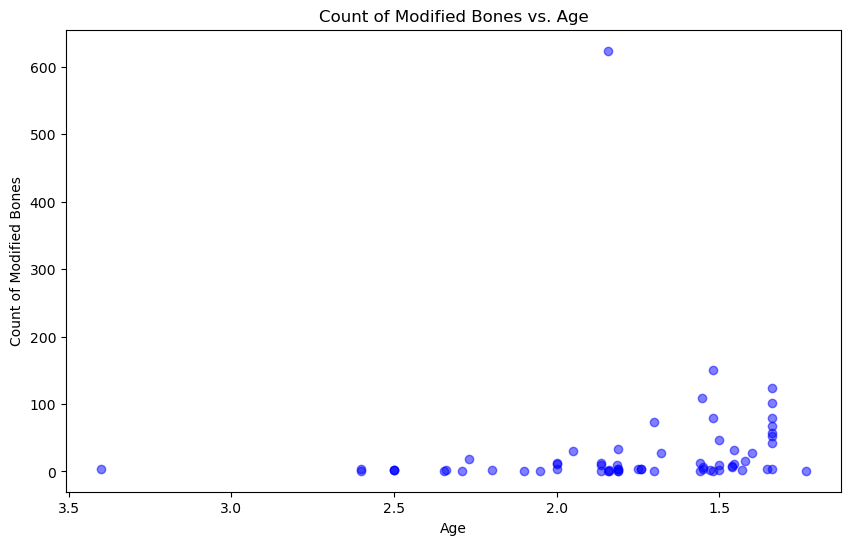

In [386]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting the data with flipped x-axis
plt.figure(figsize=(10, 6))
plt.scatter(new_df['age'], new_df['Count_Modified_Bones'], color='blue', alpha=0.5)
plt.title(f'Count of Modified Bones vs. Age')
plt.xlabel('Age')
plt.ylabel('Count of Modified Bones')
plt.gca().invert_xaxis()  # Flip x-axis
plt.show()


In [387]:
# import dataset into a pandas data frame
richness_df = pd.read_csv('pnas.2115540119.sd02.csv')
richness_df.head()

,bin,Connochaetes_sp,Kobus_sigmoidalis,Metridiochoerus_modestus,Equus_sp_nov,Eurygnathohippus_sp,Elephas_recki,Beatragus_hunteri,Gazella_praethomsoni,Pelorovis_turkanensis,...,cf_Parmularius_sp_B,Ikelohyaena_abronia,Enhydriodon_sp_A,Alcelaphini_indet_C,Gazella_cf_janenschi,Budorcas_churcheri,Australopithecus_deyiremeda,Damalborea_elisabethae,Kobus_sp_B,cf_Parmularius_sp_A
0,1.25,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1.35,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1.45,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1.55,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1.65,1,1,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [388]:
# Sum values in each row except the first column and store the result in a new column 'Row_Sum'
richness_df['Row_Sum'] = richness_df.iloc[:, 2:].sum(axis=1)

# Create a new DataFrame with only the 'Row_Sum' values and their corresponding indices
summed_df = richness_df[['bin','Row_Sum']]

# Print the new DataFrame with only the 'Row_Sum' values
summed_df.head()


,bin,Row_Sum
0,1.25,78
1,1.35,118
2,1.45,113
3,1.55,133
4,1.65,129


In [389]:
max_row_sum = summed_df['bin'].max()
min_row_sum = summed_df['bin'].min()

print(f'Maximum Row Sum: {max_row_sum}')
print(f'Minimum Row Sum: {min_row_sum}')

Maximum Row Sum: 3.35
Minimum Row Sum: 1.25


In [390]:
max_row_sum = summed_df['Row_Sum'].max()
min_row_sum = summed_df['Row_Sum'].min()

summed_df.loc[:, 'Row_Sum_Normalized'] = summed_df['Row_Sum'] / max_row_sum

summed_df.head()

C:\Users\rsore\AppData\Local\Temp\ipykernel_32256\1307799832.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summed_df.loc[:, 'Row_Sum_Normalized'] = summed_df['Row_Sum'] / max_row_sum


,bin,Row_Sum,Row_Sum_Normalized
0,1.25,78,0.565217
1,1.35,118,0.855072
2,1.45,113,0.818841
3,1.55,133,0.963768
4,1.65,129,0.934783


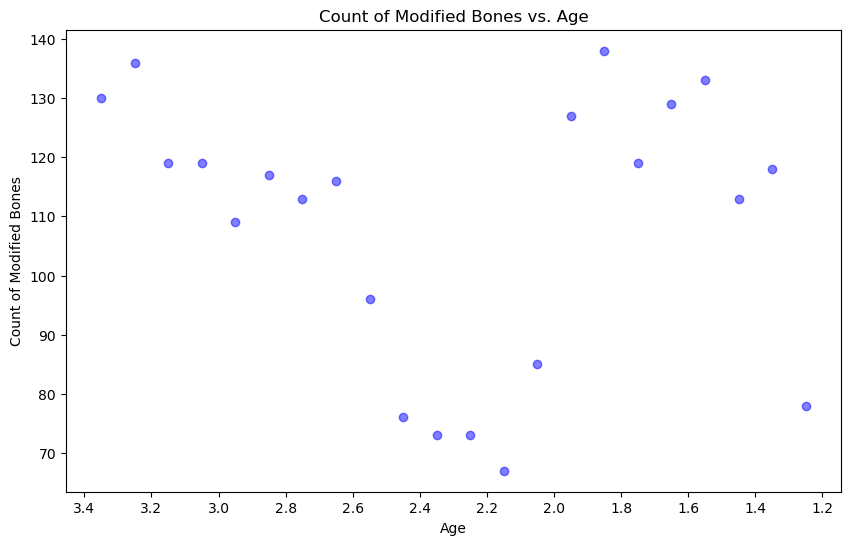

In [391]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Plotting the data with flipped x-axis
plt.figure(figsize=(10, 6))
plt.scatter(summed_df['bin'], summed_df['Row_Sum'], color='blue', alpha=0.5)
plt.title(f'Count of Modified Bones vs. Age')
plt.xlabel('Age')
plt.ylabel('Count of Modified Bones')
plt.gca().xaxis.set_major_locator(MultipleLocator(0.2))

plt.gca().invert_xaxis()  # Flip x-axis
plt.show()

In [392]:
summed_df.to_csv('species_richness_norm.csv', index=False)

In [393]:
dict_from_summed_df = summed_df.to_dict()
new_dict = {}

for i in dict_from_summed_df['bin']:
    new_dict[dict_from_summed_df['bin'][i]] = dict_from_summed_df['Row_Sum_Normalized'][i]
    
print(new_dict)

{1.25: 0.5652173913043478, 1.35: 0.855072463768116, 1.45: 0.8188405797101449, 1.55: 0.9637681159420289, 1.65: 0.9347826086956522, 1.75: 0.8623188405797102, 1.85: 1.0, 1.95: 0.9202898550724637, 2.05: 0.6159420289855072, 2.15: 0.4855072463768116, 2.25: 0.5289855072463768, 2.35: 0.5289855072463768, 2.45: 0.5507246376811594, 2.55: 0.6956521739130435, 2.65: 0.8405797101449275, 2.75: 0.8188405797101449, 2.85: 0.8478260869565217, 2.95: 0.7898550724637681, 3.05: 0.8623188405797102, 3.15: 0.8623188405797102, 3.25: 0.9855072463768116, 3.35: 0.9420289855072463}


In [394]:
richness_adj_df = new_df.copy()
for index, row in new_df.iterrows():
    age = round(row['age'], 1) + 0.05
    if age in new_dict:
        multiplier = new_dict[age]
    else:
        multiplier = new_dict[max(list(new_dict.keys()))]

    richness_adj_df.loc[index, 'Count_Modified_Bones'] = row['Count_Modified_Bones'] / multiplier

richness_adj_df.head()


,age,Count_Modified_Bones
0,2.50,2.875000
1,2.50,2.875000
2,3.40,3.184615
3,2.27,19.107692
4,2.20,3.780822


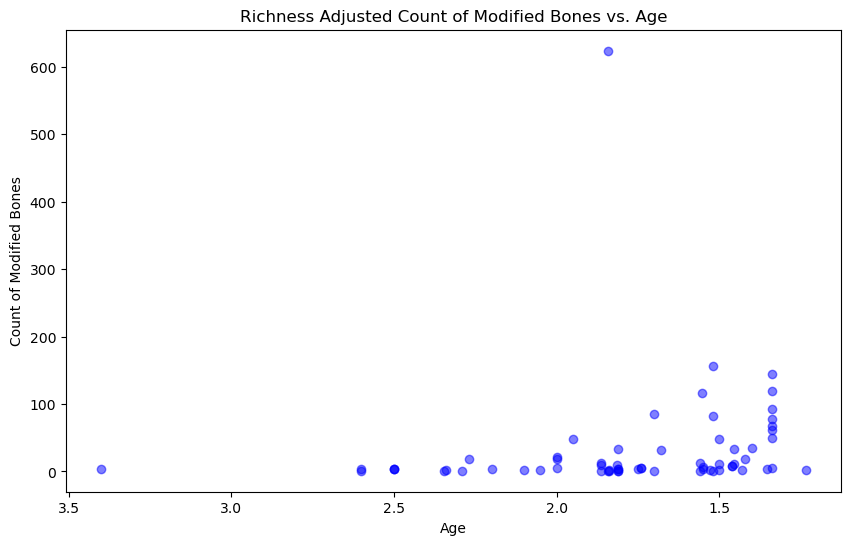

In [395]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting the data with flipped x-axis
plt.figure(figsize=(10, 6))
plt.scatter(richness_adj_df['age'], richness_adj_df['Count_Modified_Bones'], color='blue', alpha=0.5)
plt.title(f'Richness Adjusted Count of Modified Bones vs. Age')
plt.xlabel('Age')
plt.ylabel('Count of Modified Bones')
plt.gca().invert_xaxis()  # Flip x-axis
plt.show()

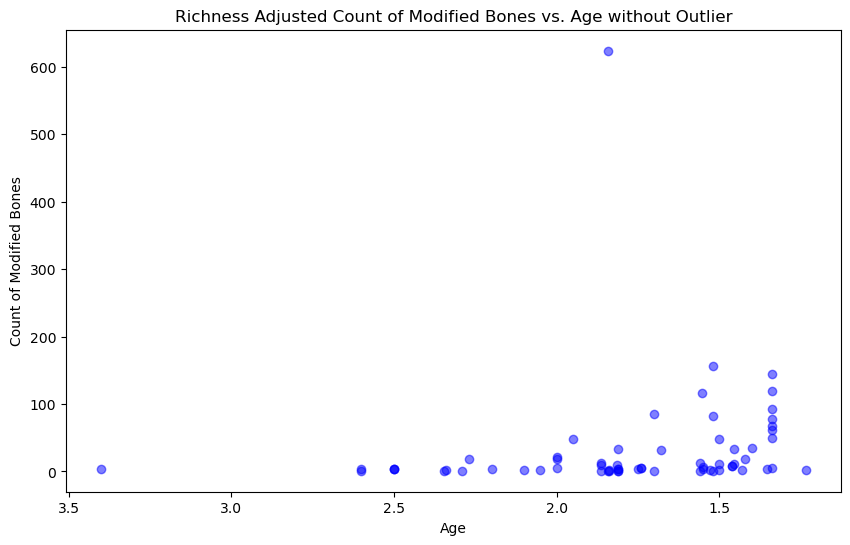

In [396]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting the data with flipped x-axis
plt.figure(figsize=(10, 6))
plt.scatter(richness_adj_df['age'], richness_adj_df['Count_Modified_Bones'], color='blue', alpha=0.5)
plt.title(f'Richness Adjusted Count of Modified Bones vs. Age without Outlier')
plt.xlabel('Age')
plt.ylabel('Count of Modified Bones')
plt.gca().invert_xaxis()  # Flip x-axis
plt.show()

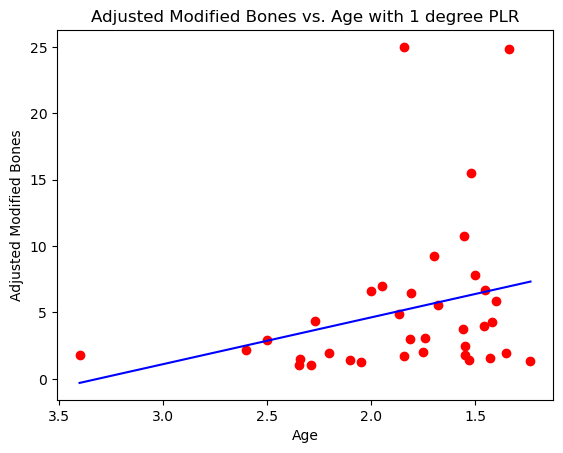

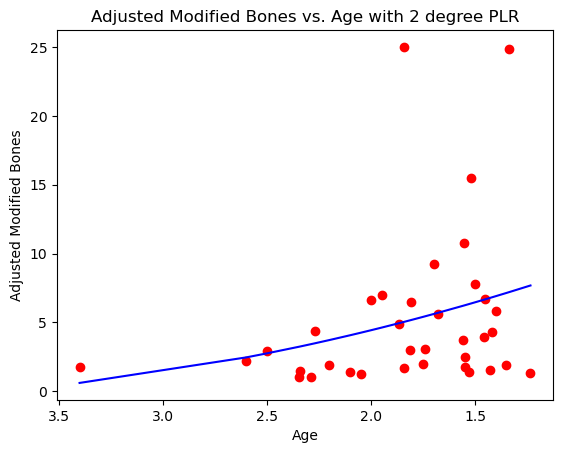

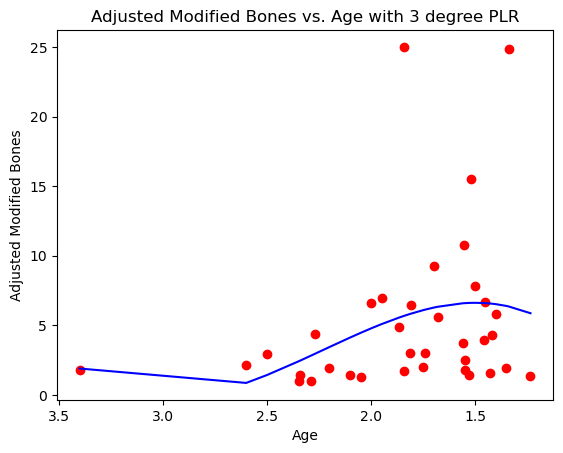

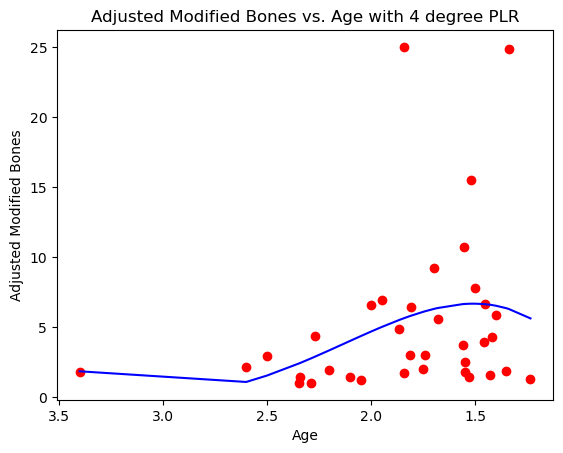

In [397]:
# Implement polynomial regression models with varying degrees.

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

degrees = 1
errors = {"MAE": [], "MSE": [], "RMSE": [], "R-Squared": []}

while degrees < 5: 
    poly_reg = PolynomialFeatures(degree=degrees)
    X_train_poly = poly_reg.fit_transform(X)
    X_test_poly = poly_reg.transform(X)

    # Training the Polynomial Regression model on the whole dataset
    Poly_reg_model = LinearRegression()
    Poly_reg_model.fit(X_train_poly, y)

    # Visualising the Training set results
    plt.scatter(X, y, color='red')
    plt.title(f'Adjusted Modified Bones vs. Age with {degrees} degree PLR')
    plt.xlabel('Age')
    plt.ylabel('Adjusted Modified Bones')
    plt.gca().invert_xaxis() # Flip x-axis
    
    # Plotting the regression line
    X_train_sorted, Y_pred_sorted = zip(*sorted(zip(X, Poly_reg_model.predict(X_train_poly))))
    plt.plot(X_train_sorted, Y_pred_sorted, color='blue')
    plt.show()

    degrees += 1


In [398]:
min_age = richness_adj_df['age'].min()
max_age = richness_adj_df['age'].max()

print(f"Minimum age: {min_age}")
print(f"Maximum age: {max_age}")

Minimum age: 1.2349999999999999
Maximum age: 3.4


In [399]:
min_bones = richness_adj_df['Count_Modified_Bones'].min()
max_bones = richness_adj_df['Count_Modified_Bones'].max()

print(f"Minimum age: {min_bones}")
print(f"Maximum age: {max_bones}")

Minimum age: 1.0
Maximum age: 624.0


In [400]:
import pandas as pd
import numpy as np

# Define the bin edges
min_age = richness_adj_df['age'].min()
max_age = richness_adj_df['age'].max()
bin_edges = [i/10 for i in range(int(min_age * 10), int(max_age * 10) + 1)]

# Create a new column with age bins
richness_adj_df['Age_Bins'] = pd.cut(richness_adj_df['age'], bins=bin_edges, right=False).apply(lambda x: x.left)

# Group by age bins and sum the counts of modified bones
binned_df = richness_adj_df.groupby('age')['Count_Modified_Bones'].sum().reset_index()

# Display the new DataFrame
print(binned_df)


       age  Count_Modified_Bones
0   1.2350              1.769231
1   1.3400            616.322034
2   1.3530              3.663717
3   1.4000             34.194690
4   1.4200             18.318584
5   1.4300              2.442478
6   1.4550             44.616541
7   1.4600             15.563910
8   1.5000             61.218045
9   1.5200            239.684211
10  1.5300              2.075188
11  1.5500              6.225564
12  1.5500              3.184615
13  1.5550            115.707692
14  1.5600             13.800000
15  1.6810             31.310924
16  1.7000             85.815126
17  1.7415              9.277311
18  1.7500              4.000000
19  1.8105             42.000000
20  1.8150              9.000000
21  1.8405              3.000000
22  1.8435            625.000000
23  1.8640             23.905512
24  1.9500             48.705882
25  2.0000             43.835294
26  2.0500              1.623529
27  2.1000              2.059701
28  2.2000              3.780822
29  2.2700

In [401]:
min_bones = binned_df['Count_Modified_Bones'].min()
max_bones = binned_df['Count_Modified_Bones'].max()

print(f"Minimum age: {min_bones}")
print(f"Maximum age: {max_bones}")

Minimum age: 1.0615384615384615
Maximum age: 625.0


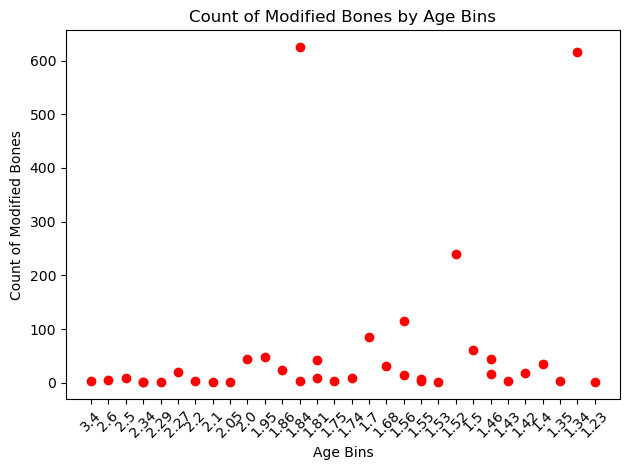

In [402]:
# Plotting
plt.scatter(binned_df['age'].apply(lambda x: round(x, 2)).astype(str), binned_df['Count_Modified_Bones'], color='red')
plt.xlabel('Age Bins')
plt.ylabel('Count of Modified Bones')
plt.title('Count of Modified Bones by Age Bins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().invert_xaxis()
plt.show()


In [403]:
X = binned_df['age'].values.reshape(-1, 1)
y = binned_df['Count_Modified_Bones']

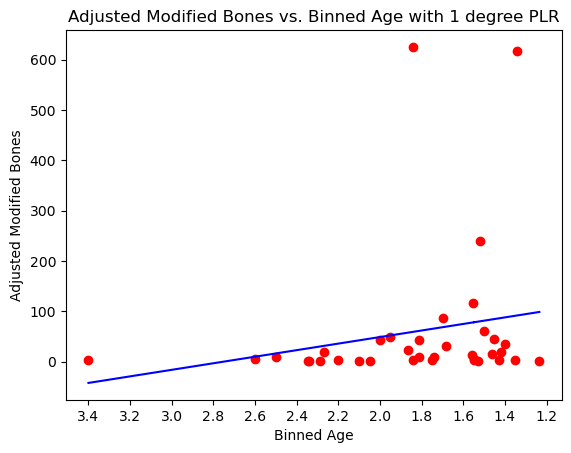

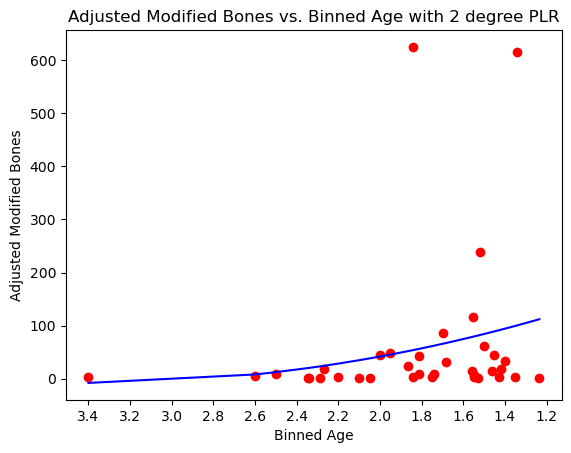

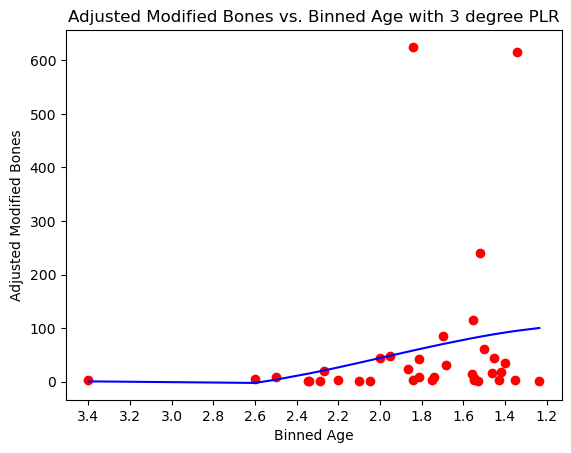

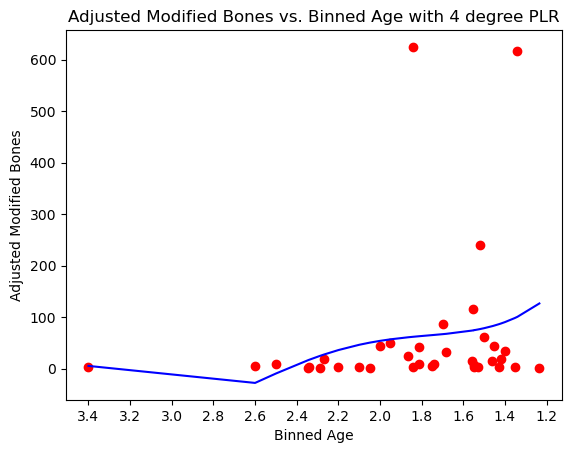

In [404]:
# Implement polynomial regression models with varying degrees.

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

degrees = 1
errors = {"MAE": [], "MSE": [], "RMSE": [], "R-Squared": []}

while degrees < 5: 
    poly_reg = PolynomialFeatures(degree=degrees)
    X_train_poly = poly_reg.fit_transform(X)

    # Training the Polynomial Regression model on the whole dataset
    Poly_reg_model = LinearRegression()
    Poly_reg_model.fit(X_train_poly, y)

    # Visualising the Training set results
    plt.scatter(X, y, color='red')
    plt.title(f'Adjusted Modified Bones vs. Binned Age with {degrees} degree PLR')
    plt.xlabel('Binned Age')
    plt.gca().xaxis.set_major_locator(MultipleLocator(0.2))
    plt.ylabel('Adjusted Modified Bones')

    
    # Plotting the regression line
    X_train_sorted, Y_pred_sorted = zip(*sorted(zip(X, Poly_reg_model.predict(X_train_poly))))
    plt.plot(X_train_sorted, Y_pred_sorted, color='blue')
    plt.gca().invert_xaxis() # Flip x-axis
    plt.show()

    degrees += 1


In [405]:
sqrt_binned_df = binned_df.copy()
sqrt_binned_df['Count_Modified_Bones'] = np.sqrt(binned_df['Count_Modified_Bones'])

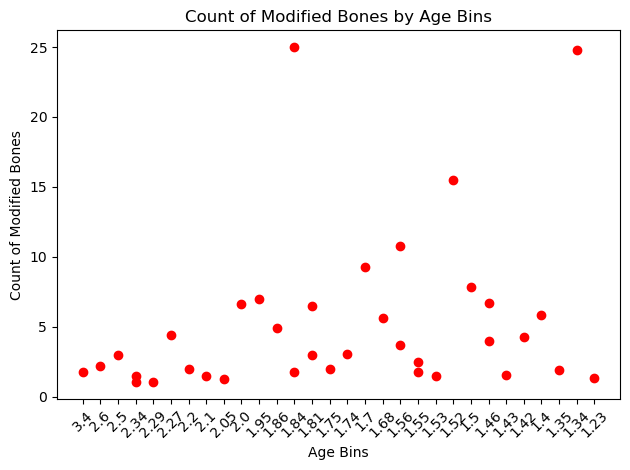

In [406]:
# Plotting
plt.scatter(sqrt_binned_df['age'].apply(lambda x: round(x, 2)).astype(str), sqrt_binned_df['Count_Modified_Bones'], color='red')
plt.xlabel('Age Bins')
plt.ylabel('Count of Modified Bones')
plt.title('Count of Modified Bones by Age Bins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().invert_xaxis()
plt.show()


In [407]:
X = sqrt_binned_df['age'].values.reshape(-1, 1)
y = sqrt_binned_df['Count_Modified_Bones']

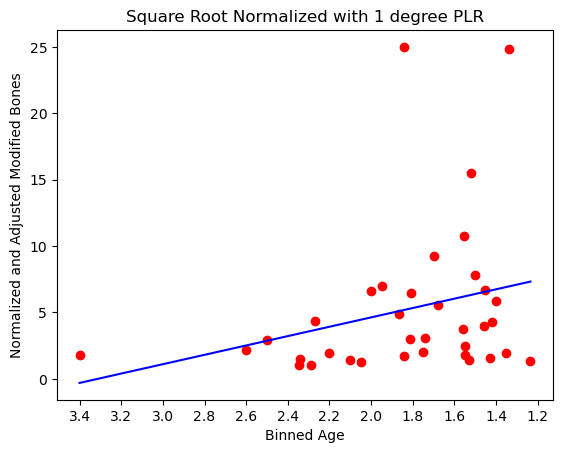

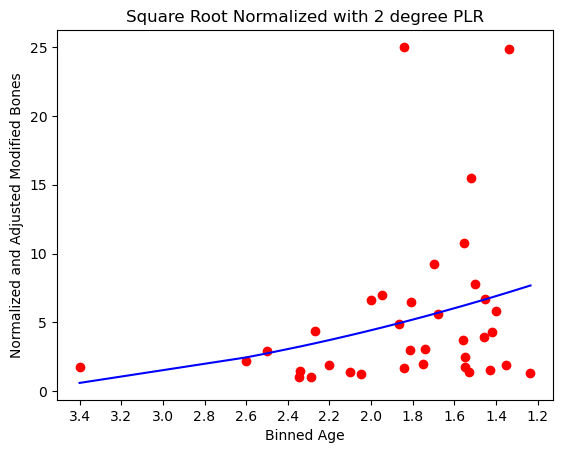

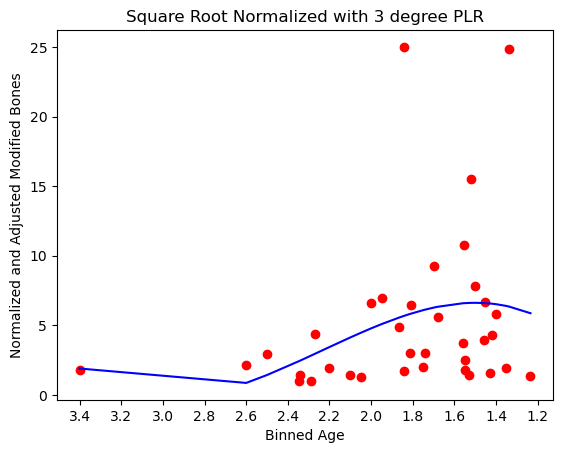

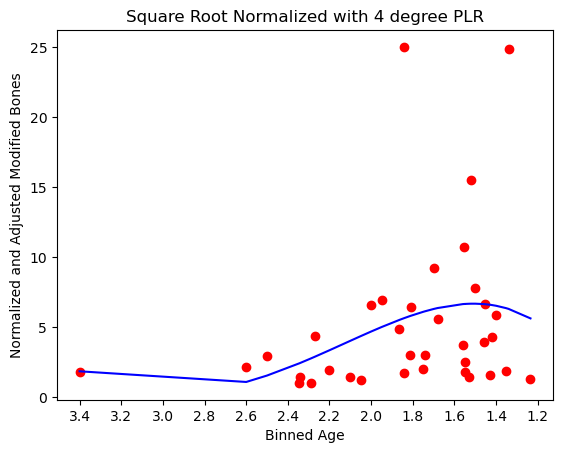

In [408]:
# Implement polynomial regression models with varying degrees.

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

degrees = 1
errors = {"MAE": [], "MSE": [], "RMSE": [], "R-Squared": []}

while degrees < 5: 
    poly_reg = PolynomialFeatures(degree=degrees)
    X_train_poly = poly_reg.fit_transform(X)

    # Training the Polynomial Regression model on the whole dataset
    Poly_reg_model = LinearRegression()
    Poly_reg_model.fit(X_train_poly, y)

    # Visualising the Training set results
    plt.scatter(X, y, color='red')
    plt.title(f'Square Root Normalized with {degrees} degree PLR')
    plt.xlabel('Binned Age')
    plt.gca().xaxis.set_major_locator(MultipleLocator(0.2))
    plt.ylabel('Normalized and Adjusted Modified Bones')

    
    # Plotting the regression line
    X_train_sorted, Y_pred_sorted = zip(*sorted(zip(X, Poly_reg_model.predict(X_train_poly))))
    plt.plot(X_train_sorted, Y_pred_sorted, color='blue')
    plt.gca().invert_xaxis() # Flip x-axis
    plt.show()

    degrees += 1
